In [3]:
# Get libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected= True)
import folium
import plotly.plotly as py
import plotly.graph_objs as go

# Uber Data
### Load Uber datasets from April - September 2014 

In [4]:
april_data = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-apr14.csv')
aug_data = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-aug14.csv')
jan_june_data = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv')
july_data = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-jul14.csv')
june_data = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-jun14.csv')
may_data = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-may14.csv')
sept_data = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-sep14.csv')

#### Convert the format of data and time and create a complete dataset for year 2014

In [5]:
april_data['Date/Time'] = pd.to_datetime(april_data['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
aug_data['Date/Time'] = pd.to_datetime(aug_data['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
#jan_june_data['Date/Time'] = pd.to_datetime(jan_june_data['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
july_data['Date/Time'] = pd.to_datetime(july_data['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
june_data['Date/Time'] = pd.to_datetime(june_data['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
may_data['Date/Time'] = pd.to_datetime(may_data['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
sept_data['Date/Time'] = pd.to_datetime(sept_data['Date/Time'], format = "%m/%d/%Y %H:%M:%S")

uber_data = [april_data,may_data,june_data,july_data,aug_data,sept_data]
uber_data = pd.concat(uber_data)

In [6]:
april_data.head(5)

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


### Visual Map to see locations in Newyork where Uber was booked 

In [7]:
#Using folim map to plot Latitude and Longitude data
# setting the location to mean of latlon datapoints
latlon = april_data[['Lat','Lon']]
mapit = folium.Map( location=[40.740005, -73.976817], zoom_start= 9)
for coord in latlon.values[1:1000,:]:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
#mapit.save( 'map.html')
mapit

#### Extracting Hours ,Week,and Days per month info 

In [8]:
# Adding day ,month ,hour for each dataframe
april_data['Day_of_week'] =april_data['Date/Time'].dt.weekday_name
april_data['Day_index'] = april_data['Date/Time'].dt.dayofweek
april_data['Days_Per_Month'] = april_data['Date/Time'].dt.day
april_data['HourOfDay'] = april_data['Date/Time'].dt.hour

week_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

may_data['Day_of_week'] =may_data['Date/Time'].dt.weekday_name
may_data['Day_index'] = may_data['Date/Time'].dt.dayofweek
may_data['Days_Per_Month'] = may_data['Date/Time'].dt.day
may_data['HourOfDay'] = may_data['Date/Time'].dt.hour

june_data['Day_of_week'] = june_data['Date/Time'].dt.weekday_name
june_data['Day_index'] = june_data['Date/Time'].dt.dayofweek
june_data['Days_Per_Month'] = june_data['Date/Time'].dt.day
june_data['HourOfDay'] = june_data['Date/Time'].dt.hour

july_data['Day_of_week'] =july_data['Date/Time'].dt.weekday_name
july_data['Day_index'] = july_data['Date/Time'].dt.dayofweek
july_data['Days_Per_Month'] = july_data['Date/Time'].dt.day
july_data['HourOfDay'] = july_data['Date/Time'].dt.hour

aug_data['Day_of_week'] =aug_data['Date/Time'].dt.weekday_name
aug_data['Day_index'] = aug_data['Date/Time'].dt.dayofweek
aug_data['Days_Per_Month'] = aug_data['Date/Time'].dt.day
aug_data['HourOfDay'] = aug_data['Date/Time'].dt.hour

sept_data['Day_of_week'] =sept_data['Date/Time'].dt.weekday_name
sept_data['Day_index'] = sept_data['Date/Time'].dt.dayofweek
sept_data['Days_Per_Month'] = sept_data['Date/Time'].dt.day
sept_data['HourOfDay'] = sept_data['Date/Time'].dt.hour


In [9]:
april_data['Days_Per_Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

### Trips per Day : April 

Text(0.5,1,'Trips Per Day')

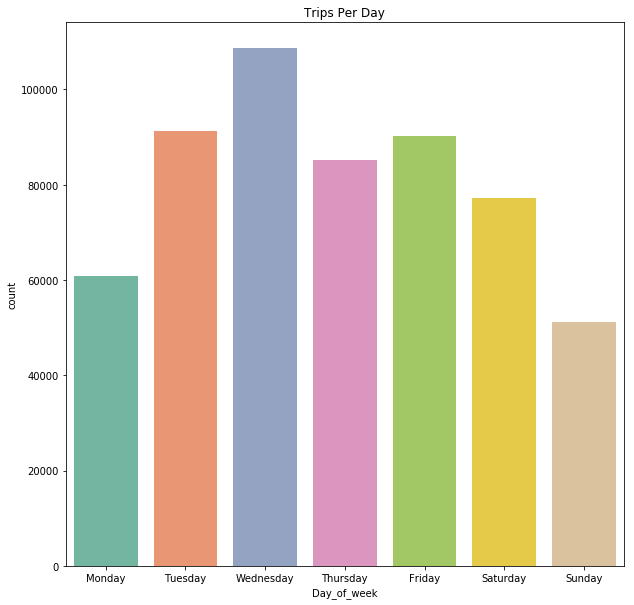

In [10]:
fig, ax = plt.subplots(figsize= (10,10))
sns.countplot(april_data.Day_of_week, order = week_names,ax=ax,palette="Set2").set_title('Trips Per Day')

### Trips Per Hour : April 

Text(0.5,1,'Trips Per Hour')

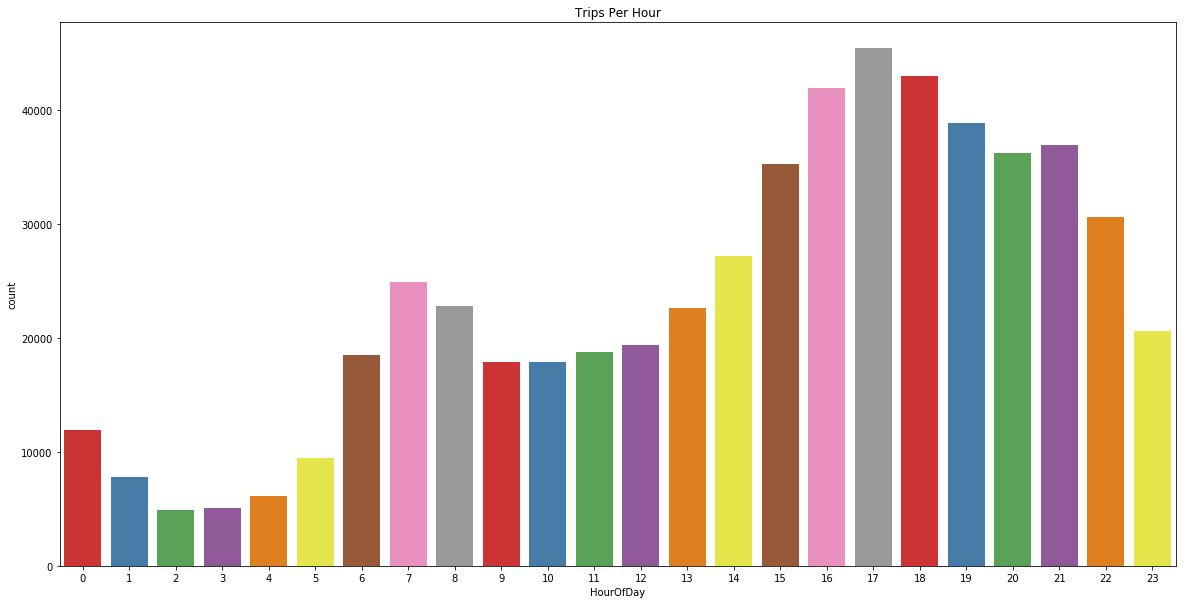

In [11]:
fig, ax = plt.subplots(figsize= (20,10))
sns.countplot(april_data.HourOfDay,ax=ax,palette="Set1").set_title("Trips Per Hour")

### Trips per Month : April

Text(0.5,1,'Trips Per Month')

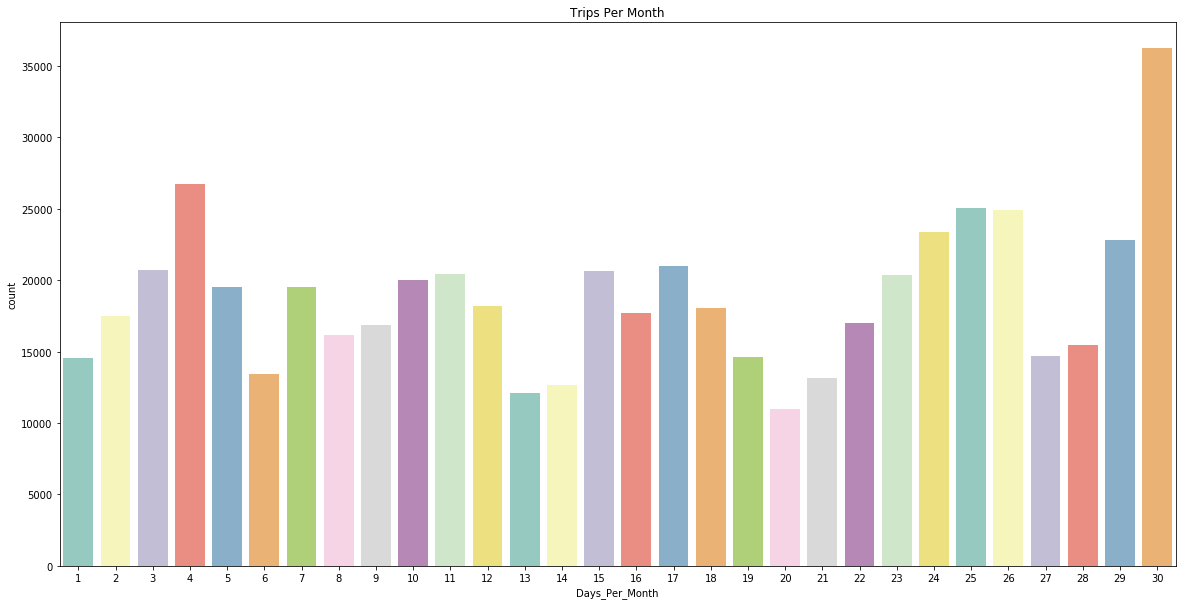

In [12]:
fig, ax = plt.subplots(figsize= (20,10))
sns.countplot(april_data.Days_Per_Month,ax= ax,palette="Set3").set_title("Trips Per Month")

## Visualization of Complete Uber Dataset 

In [13]:
uber_data.shape

(4534327, 4)

In [14]:
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour
uber_data['Day_of_week'] =uber_data['Date/Time'].dt.weekday_name
uber_data['Day_index'] = uber_data['Date/Time'].dt.dayofweek
uber_data['Days_Per_month'] = uber_data['Date/Time'].dt.day
uber_data['Month'] = uber_data['Date/Time'].dt.month


In [15]:
uber_data.head(5)

,Date/Time,Lat,Lon,Base,HourOfDay,Day_of_week,Day_index,Days_Per_month,Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday,1,1,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday,1,1,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,Tuesday,1,1,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,Tuesday,1,1,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,Tuesday,1,1,4


### Total trips per week aggregated over the year 2014

Text(0.5,1,'Trips per Hour-Month')

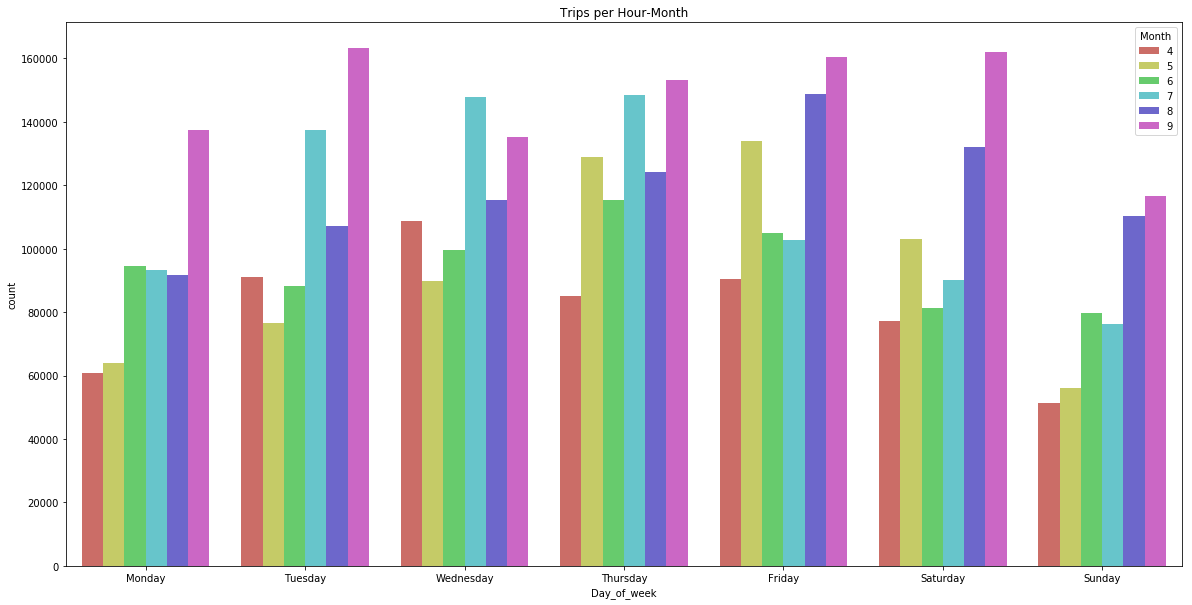

In [16]:
fig, ax = plt.subplots(figsize= (20,10))
sns.countplot(uber_data.Day_of_week,hue = uber_data.Month,order =week_names,palette="hls", ax = ax).set_title("Trips per Hour-Month")

### Total trips per hour aggregated over the year 2014


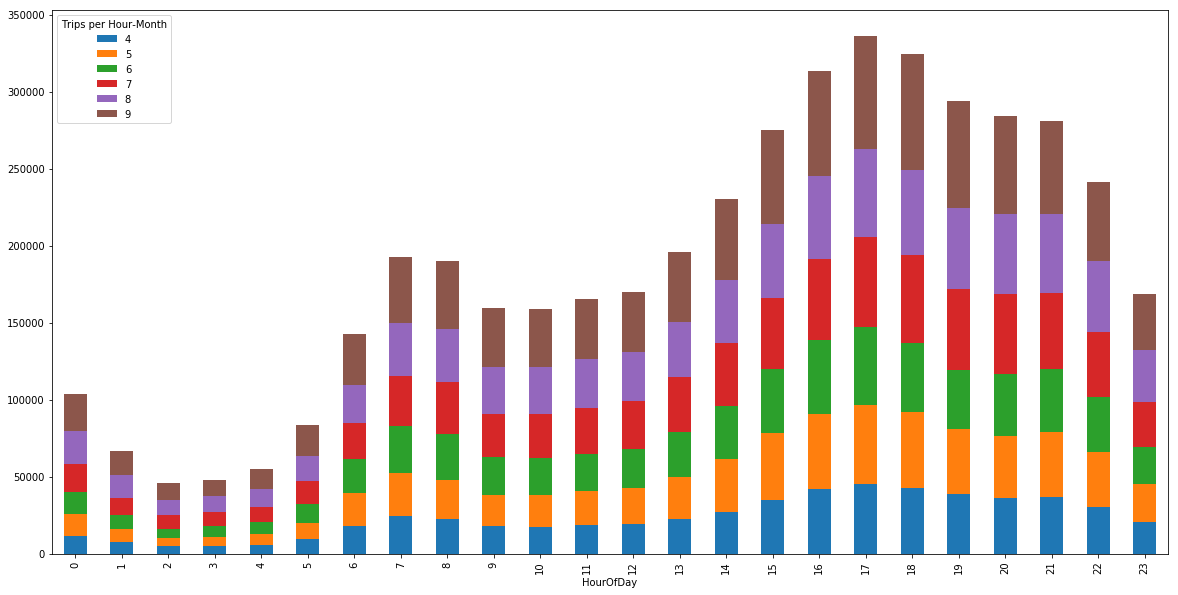

In [17]:
uber_month_day = uber_data[['Month','HourOfDay']]
uber_crosstab = pd.crosstab(uber_month_day.HourOfDay,uber_month_day.Month )

fig, ax = plt.subplots(figsize= (20,10))
uber_crosstab.plot.bar(stacked=True, ax=ax)
plt.legend(title='Trips per Hour-Month',loc ='best')

# Lyft Dataset 

In [18]:
lyft_data = pd.read_csv('./uber-pickups-in-new-york-city/other-Lyft_B02510.csv')
lyft_data = lyft_data.drop(columns= ['Unnamed: 3'])
lyft_data['time_of_trip'] = pd.to_datetime(lyft_data['time_of_trip'], format = "%m/%d/%Y %M:%S")

lyft_data.head(5)

,time_of_trip,start_lat,start_lng
0,2014-09-04 00:09:51,40.64705,-73.77988
1,2014-08-27 00:21:13,40.74916,-73.98373
2,2014-09-04 00:14:16,40.64065,-73.97594
3,2014-09-04 00:16:08,40.75002,-73.99514
4,2014-08-28 00:02:41,40.76715,-73.98636


In [19]:
lyft_data['HourOfDay'] = lyft_data['time_of_trip'].dt.hour
lyft_data['Day_of_week'] =lyft_data['time_of_trip'].dt.weekday_name
lyft_data['Day_index'] = lyft_data['time_of_trip'].dt.dayofweek
lyft_data['Days_Per_month'] = lyft_data['time_of_trip'].dt.day
lyft_data['Month'] = lyft_data['time_of_trip'].dt.month


In [20]:
lyft_data.head(5)


,time_of_trip,start_lat,start_lng,HourOfDay,Day_of_week,Day_index,Days_Per_month,Month
0,2014-09-04 00:09:51,40.64705,-73.77988,0,Thursday,3,4,9
1,2014-08-27 00:21:13,40.74916,-73.98373,0,Wednesday,2,27,8
2,2014-09-04 00:14:16,40.64065,-73.97594,0,Thursday,3,4,9
3,2014-09-04 00:16:08,40.75002,-73.99514,0,Thursday,3,4,9
4,2014-08-28 00:02:41,40.76715,-73.98636,0,Thursday,3,28,8


### Visual map to see locations in Newyork where Lyft was booked

In [21]:
#Using folim map to plot Latitude and Longitude data
# setting the location to mean of latlon datapoints
lyft_latlon = lyft_data[['start_lat','start_lng']]
latlon_mean = lyft_latlon.mean()
map_lyft = folium.Map( location=[latlon_mean[0], latlon_mean[1]], zoom_start= 9)
for coord in lyft_latlon.values[1:1000,:]:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( map_lyft )
#mapit.save( 'map.html')
map_lyft

### Total trips per month over the year :2014

Text(0.5,1,'Lyft- Trips per Days in a Month : Month in Year')

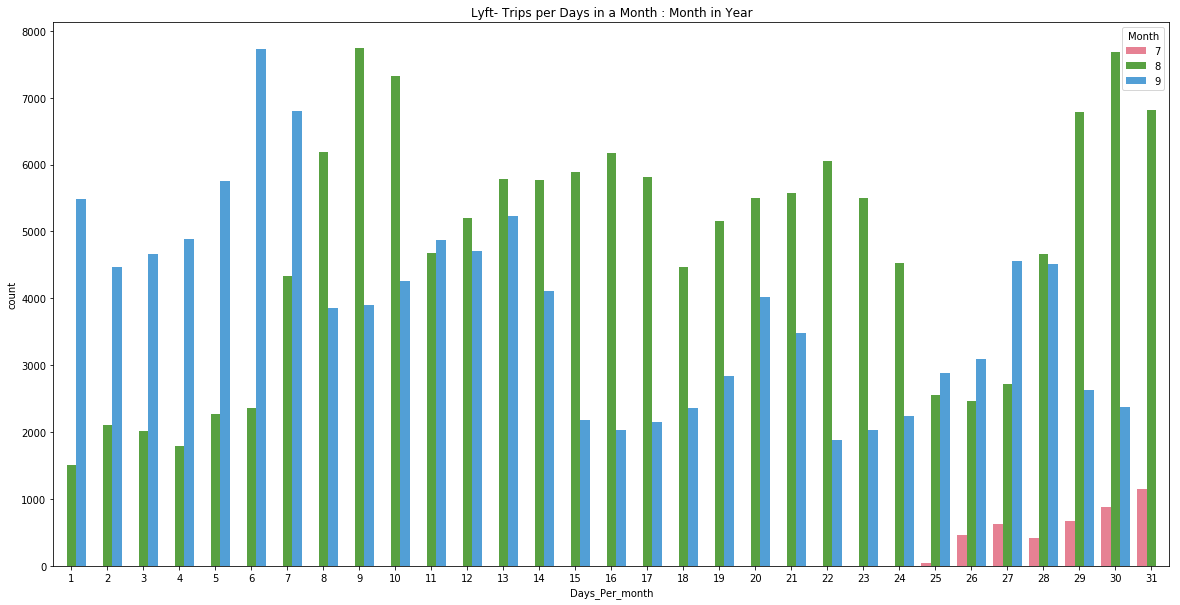

In [22]:
fig, ax = plt.subplots(figsize= (20,10))
sns.countplot(lyft_data.Days_Per_month,hue = lyft_data.Month,palette="husl", ax = ax).set_title("Lyft- Trips per Days in a Month : Month in Year")

### Total trips per week over the year : 2014

Text(0.5,1,'Lyft- Trips per Day-Month')

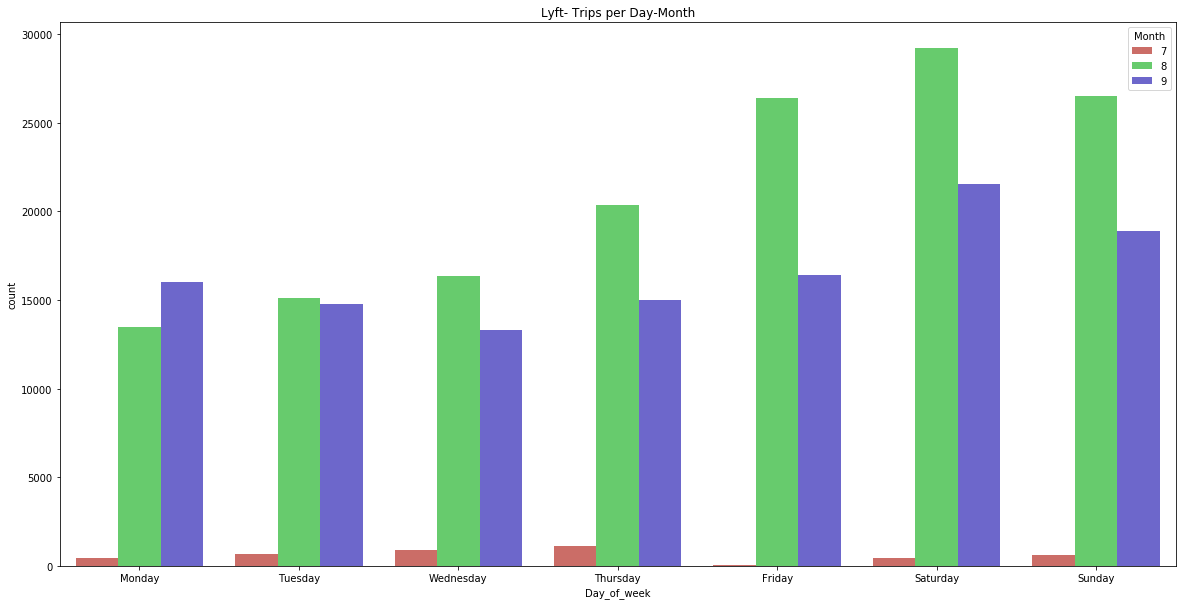

In [23]:
fig, ax = plt.subplots(figsize= (20,10))
sns.countplot(lyft_data.Day_of_week,hue = lyft_data.Month,order =week_names,palette="hls", ax = ax).set_title("Lyft- Trips per Day-Month")

#### Comparing total pickups by Uber and Lyft in July ,August, Sept  

In [31]:
# Extracting uber data for 3 months 
uber_3months = [july_data,aug_data,sept_data]
uber_3months = pd.concat(uber_3months)
uber_3months['Month'] = uber_3months['Date/Time'].dt.month

(0, 50000)

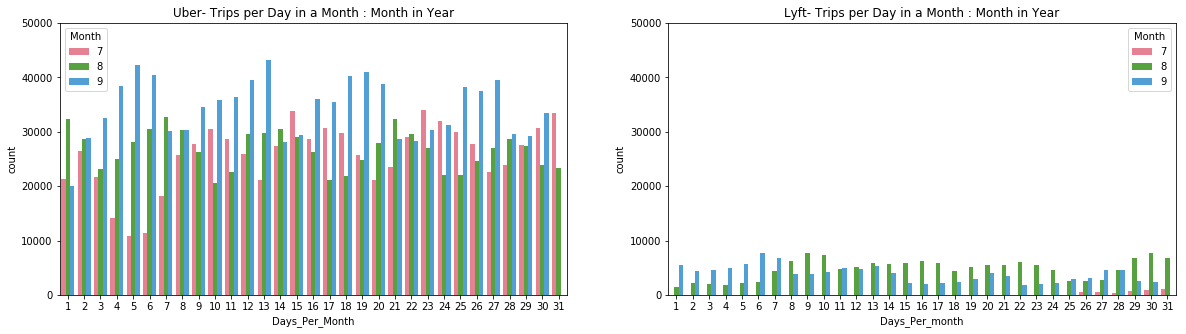

In [48]:
fig, ax =plt.subplots(1,2,figsize = (20,5))
sns.countplot(uber_3months.Days_Per_Month,hue = uber_3months.Month,palette="husl",ax= ax[0]).set_title("Uber- Trips per Day in a Month : Month in Year")
sns.countplot(lyft_data.Days_Per_month,hue = lyft_data.Month,palette="husl", ax = ax[1]).set_title("Lyft- Trips per Day in a Month : Month in Year")
ax[0].set_ylim(0,50000)
ax[1].set_ylim(0,50000)

Countplots reveal significant difference in trip counts between Uber and Lyft 

In [49]:
uber_data.head(5)

,Date/Time,Lat,Lon,Base,HourOfDay,Day_of_week,Day_index,Days_Per_month,Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday,1,1,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday,1,1,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,Tuesday,1,1,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,Tuesday,1,1,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,Tuesday,1,1,4


In [67]:
#uber_data_trips = uber_data.groupby(['Date/Time','Base']).size().reset_index(name='counts')
uber_data_trips = uber_data.groupby([uber_data['Date/Time'].dt.date,'Base']).size().reset_index(name='counts')
uber_data_trips.columns = ['Date','Base','Trips']
uber_data_trips.shape

(915, 3)

In [69]:
uber_data_trips.head(20)

,Date,Base,Trips
0,2014-04-01,B02512,1011
1,2014-04-01,B02598,3738
2,2014-04-01,B02617,3219
3,2014-04-01,B02682,6255
4,2014-04-01,B02764,323
5,2014-04-02,B02512,1336
6,2014-04-02,B02598,4526
7,2014-04-02,B02617,3752
8,2014-04-02,B02682,7515
9,2014-04-02,B02764,345


### Comparing Uber trips in 2014 and 2015 

In [101]:
uber_trips_2014 = uber_data_trips
uber_trips_2015 = pd.read_csv('./uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv')
uber_trips_2015['date'] = pd.to_datetime(uber_trips_2015['date'], format = "%m/%d/%Y")

In [118]:
# uber_trips_month_2014 = uber_data.groupby([uber_data['Date/Time'].dt.month]).size().reset_index(name='counts')
# uber_trips_month_2015 = uber_trips_2015.groupby([uber_trips_2015['date'].dt.month]).size().reset_index(name='counts')
uber_trips_month_2014 = uber_data.groupby(['Base']).size().reset_index(name='counts')
uber_trips_month_2015 = uber_trips_2015.groupby(['dispatching_base_number']).size().reset_index(name='counts')

In [113]:
uber_trips_2015.head(10)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537
5,B02598,2015-01-01,870,6903
6,B02598,2015-01-02,785,4768
7,B02617,2015-01-02,1137,7065
8,B02512,2015-01-02,175,875
9,B02682,2015-01-02,890,5506


In [120]:
uber_trips_month_2014

,Base,counts
0,B02512,205673
1,B02598,1393113
2,B02617,1458853
3,B02682,1212789
4,B02764,263899


In [121]:
uber_trips_month_2015

,dispatching_base_number,counts
0,B02512,59
1,B02598,59
2,B02617,59
3,B02682,59
4,B02764,59
5,B02765,59
